### Where are we now?

- Bootcamp: Python 
- Numpy, Pandas, Sklearn, (Matplotlib)
- If you reach here, and you can do the quiz VERY WELL, you can already go outside and work....

- Series of machine learning from scratch
    - Why? Chaky? We already have sklearn, why scratch?

## Feedback
- Generally, everyone did very well.....

- High level comment: Be less a programmer, Be more like a scientist
    - Think thrice, code once

- Label encoding vs. One-hot encoding
    - Use label encoding when there are way too many categories.... like 30 or 50......
    - when you use one-hot encoding, before you use, maybe you can think about grouping them, to make less categories.....

- None of you has hypothesis......
- None of you has research question......
- Very few of you has discussion, interpretation.........

## Linear Regression from Scratch

| | Egg price  | Gold price    | Oil price   | GDP   |
|---:|:-------------|:-----------|:------|:------|
| 1 | 3  | 100       | 4   | 21   |
| 2 | 4  | 500    | 7   | 43     |

In [168]:
import numpy as np
import random

In [278]:
#sample 1
x1 = np.array([3,100,4])
y1 = np.array([21])

#what's the idea of prediction? What is machine learning?
#- find the weights that can bring you from x1 to y1

#first smaple
#3 * w1 + 100 * w2 + 4 * w3 = 21
#3 * 1 + 100 * 1 + 4 * 1 = 107
#3 * 7 + 100 * 1 + 4 * -25 = 21

#machine learning is trying to find the 'best' weights

#second smaple
#4 * w1 + 500 * w2 + 7 * w3 = 43
#4 * 7 + 500 * 1 + 7 * -25 = 353

#machine laering is trying to find the 'best' weights ACROSS all samples....

#all deep learning is based on these weight systems

In [279]:
#Definiton of terms and notations

#2 samples
#3 features - egg price, gold price, oil price
    #features are the variables used for predictingthe label
    #factors, independent variable, predictiors, X

#egg price - x_1 --> always a vector, e.g. [3,4]
#gold price - x_2 --> always a vector, e.g. [100,500]
#oil price - x_3 --> always a vector, e.g. [4,7]
#we call egg price + gold price + oil price - whole 'feature matrix' --> \mathbg{x}

#1 label -gdp
    #label is the variable that we want to predict
    #target, outcome, y
    #y_1 = y = a vector of labels, e.g.[21,43]

#Tips: small and big
#small mean

Math notations:
- normal  a -> scalar (one number)
- bold $\mathbf{a}$ --> vector (a 1D numpy array)
- bold $\mathbf{A}$ --> matrix (a 2D numpy array) 

- $\mathbf{x}_1^2$ --> feature 1, second sample

In [280]:
X = np.array([[3,100,4],[4,500,7]])
X.shape #(2,3) means 2 samples = m, 3 features = n 

(2, 3)

In [281]:
#weight = theta = params
theta = np.array([7,1,-25])
theta.shape #weight must be the sampleshape as X.shape[1]

(3,)

In [282]:
# X.dot(theta)
#To be able to dot, the number should be same in the close pair
#(2,3) @ (3, ) = (2,)
#(4,6) @ (6, ) = (4,)
#(4,6,1) @ (1,2) = (4,6,1,2)

X @ theta

#the common error: matmul error

array([ 21, 353])

In [283]:
X[0][0] * theta[0] + X[0][1] * theta[1] + X[0][2] * theta[2]

21

### How to find the best weight?
- There are many ways, e.g, closed from, gradient descrent, expectation
- gradient descent / backpropagation
    - you adjust the weight slightly, based on the errors....
    - How to adjust basaed on the erorrs

0. You first use any randomized weight
    
    [1,2,3]

1. We need to find out how to measure errors

$\sum_0^m (\hat{y}_i - y_i)^2 $

2. We need to know how much to adjust the weight? HOW?

Just try all number in the world........ NOOOOO

Find the derivative first!

$(\hat{y}_i - y_i) *x_j$

$\mathbf{X}^\top(\mathbf{\hat{y} - \mathbf{y}})$



3. We need to cahgne the weight accordingly

$ weight_j = weight_j - \alpha * derivative $

only for one sample

$ weight_j = weight_j - \alpha* (\hat{y}_i - y_i) * x_j $

do for all sample

$ \mathbf{w} = \mathbf{w} - \alpha * \mathbf{X}^\top(\mathbf{\hat{y} - \mathbf{y}}) $

Note: $\alpha$ - 0.1, 0.01, 0.001, 0.0001

4. Run predict again....

5. We stop when our errors are decreased no more....or reach some max iterations...

In [284]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'error/cost')

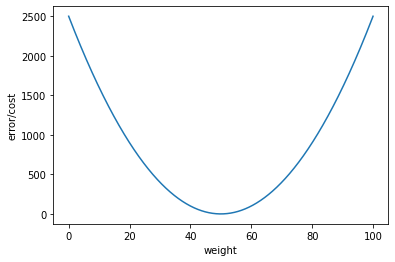

In [285]:
x = np.linspace(0,100,1000)
y = (x-50)**2

plt.plot(x,y)
plt.xlabel('weight')
plt.ylabel("error/cost")

#### Steps for linear regression / gradient descent

### Gradient descent is basically backpropagation in deep learning......

Step 1: Randomize your weight

- weight.shape (n, )

Step 2: Use this inital weight to predict

- you will get errors

Step 3: Find the derivative

- $\mathbf{X}^\top(\mathbf{\hat{y} - \mathbf{y}})$

Step 4: Change the weight

- $ \mathbf{w} = \mathbf{w} - \alpha * \mathbf{X}^\top(\mathbf{\hat{y} - \mathbf{y}}) $

Step 5: Repeat Step 2, 3, 4, until you either (1) reach the max iteration, or (2) your validation loss does not decrease anymore

#### Let's code

#### Step 1: Load some toy dataset

In [298]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

#print the shape of X and y
X.shape, y.shape
assert X.ndim == 2
assert y.ndim == 1
#print one of X, and maybe try to see what it is 
# x[0]
#print one of y, and maybe try to see what it is 
# y[0]
# diabetes.feature_names
#label is blood glucose level....

#please help me set m and n 
m,n = X.shape

#write an assert function to check that X and y has same amount of samples...
assert m == y.shape[0]

Note: We skip EDA and cleaninig, because we are lazy; but actually this dataset is already clean

#### Step 2: Train Test Split

In [299]:
from sklearn.model_selection import train_test_split

#split here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=999)

#assert that X_train and y_train has the same amount of samples
#assert that X_test and y_test has the same amount of samples
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [300]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309, 10), (133, 10), (309,), (133,))

#### Step 3: Standardziation

In [301]:
#import the StandatdScalar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#standardize the traing set
X_train = sc.fit_transform(X_train)

#standardize the test set
X_test = sc.transform(X_test)

#### Step 4: Add intercept to your X

In [302]:
# Example: if your X is        [  [3, 2, 4],    [2, 6, 8]  ]
# I want you to make it into   [  [1, 3, 2, 4], [1, 2, 6, 8]  ]
# Why 1?  because imagine you have another weight, which let's call w0
# this w0 is actually the intercept; so multiply with 1, will do nothing
# so we can still use X @ theta....

intercept = np.ones((X_train.shape[0],1))
intercept.shape

#hint: use np.concatenate with X_train on axis = 1, to add these ones to X_train
# X_train = np.concatenate((intercept, X_train), axis=1)
# or 
X_train = np.insert(X_train,0,1,axis=1) #insert(array,position,value,axis)
X_test = np.insert(X_test,0,1,axis=1) #insert(array,position,value,axis)

In [303]:
X_train.shape, X_test.shape

((309, 11), (133, 11))

#### Step 5: Fitting!!! Gradient Descent

In [294]:
#put everything fit()
alpha = 0.001
max_iter = 10000
#1. randomize out theta
#please help me create a random theta of size (X_train.shape[1])
theta = np.ones(X_train.shape[1])

def predict(X,theta):
    y_pred = X @ theta
    return y_pred

def mean_squared_error(y_hat,y): #loss or cost function
    # return np.sum(np.square(y_pred - y))
    return ((y_hat - y)**2).sum() /y.shape[0]

def _gradient(X,error): #it's only for internal purpose 
    #not for external purpose
    #what do you mean by external: i mean the main() program of python
    return X.T @ error

def fit(X, y, theta, alpha, max_iter):
    for i in range(max_iter):
        #2. predict 
        y_hat = predict(X,theta)

        #2.1 can you guys compute the squared error
        #print(the mean sqaure error, we can see whether MSE goes down eventually)
        mse = mean_squared_error(y_hat,y)
        # if ( i%50 ==0 ):
        #     print(f'MSE: {mse}')
        # print('MSE',mse)

        #3. get derivativaes
        deriv = _gradient(X_train, y_hat - y)
        #4. update weight
        theta = theta - alpha*deriv

        #5.repeat 1,2,3,4
        #please put a for loop for 2,3,4
        #set 1000 call it max_iter
    # return theta

In [295]:
theta = fit(X_train,y_train,theta,alpha,max_iter) 
#model is the weight

#### Step 6: Testing

In [296]:
y_hat = predict(X_test,theta)

mean_squared_error(y_hat,y_test)

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

### Many things I wanna do today

Objectives:

1. Understand better about cross validation
2. Remind how to write a  class
3. Learn about stochastic and mini-batch gradient descent, which are very important concepts later on in deep learing......

minibatch-gradient descent
- use only a subset of data for finding the gradient
- why?
- because using the whole set of data to find the gradient takes time
- we assume that the subset of data, should give a general good slope anyway for the whole population

stochastic-gradient descent
- use only one sample to get the gradient
- very fast (but NOT good! usually)
- Exercise: add a parameter at init called 'method'
    - if method = mini_batch, then do mini_batch
    - if method = sto, go sto ==> please do without replacement
    - otherwise, do the normally gradient_descent

In [150]:
#Ex1 : Please Write this whole thing & class called LinearRegression()
    #it should have two functions at least
    #fit() to fit the model
    #predict() to inference
    #trivial: try to do like what sklearn do....
    #15:10 - 15:30

In [304]:
from sklearn.model_selection import KFold
class LinearRegression():
    kfold = KFold(n_splits=5)
    def __init__(self,max_iter=1000,alpha=0.0001,num_epochs=5,batch_size=50,method='batch',
        cv=kfold):
        self.max_iter = max_iter
        self.alpha = alpha
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method = method
        self.cv = cv

    def predict(self,X):
        y_pred = X @ self.theta
        return y_pred

    def mean_squared_error(self,y_hat,y):
        return ((y_hat - y)**2).sum() /y.shape[0]

    def _gradient(self,X,error):
        return X.T @ error
        
    def cross_validation(X,fold=3):
        dataset_split = list()
        return dataset_split

    def fit(self,X_train, y_train):
        #using training .......

        #create a list of kfold scores
        self.kfold = list()

        #please change it ot cross-validation
        for fold,(train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            X_cross_train, X_cross_val = X_train[train_idx], X_train[val_idx]
            y_cross_train, y_cross_val = y_train[train_idx], y_train[val_idx]

            #create self.theta
            self.theta = np.zeros(X_cross_train.shape[1]) #based on features

            #define X_train as only a subset of the data
            #how big is this subset ? mini-batch size ==> 50
            
            #one epoch will exhaust the WHOLE training set
            for epoch in range(self.num_epochs):
                #with replacement or no replacement
                #with replacement mean jsut randomize
                #with no replace menes 0:50 51:100 101:150.... 300:323
                #shuffle you index
                #===> please shuffle your index
                perm = np.random.permutation(X_cross_train.shape[0]) #return as a list of index
                # print(permuted_index)
                X_cross_train = X_cross_train[perm]
                y_cross_train = y_cross_train[perm]

                if self.method == 'mini':
                    for batch_idx in range(0,X_cross_train.shape[0], self.batch_size):
                        #batch_idx = 0,50,100,150
                        X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size,:]
                        y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                        # print(X_method_train.shape)
                        self._train(X_method_train, y_method_train)
                elif self.method == 'sto':
                    for sto_idx in range(0,X_cross_train.shape[0]):
                        X_method_train = X_cross_train[sto_idx,:].reshape(1,-1) #(11,) => (1,11)
                        y_method_train = y_cross_train[sto_idx]
                        # print(X_method_train.shape)
                        self._train(X_method_train, y_method_train)
                else: #'gradient_descent'
                    X_method_train = X_cross_train
                    y_method_train = y_cross_train
                    self._train(X_method_train, y_method_train)
            #print the validation
            yhat_val = self.predict(X_cross_val)
            self.kfold.append(mean_squared_error(y_cross_val,yhat_val))
            # print(f'Fold {fold:} : {mean_squared_error(y_cross_val,yhat_val)}')

    def _train(self, X, y):
        y_hat = self.predict(X)
        #1.1 Optionally, print loss
        # mse = self.mean_squared_error(y_hat,y_train)
        #2.get gradient
        deriv = self._gradient(X, y_hat - y)
        #3. adjust theta/coef
        self.theta = self.theta - self.alpha*deriv

    def _coef(self): #<------ basically theta
        return self.theta[1:]   #remind that theta is (w0,w1,w2,w3,w4,....,wn)
                                #w0 is the bias or the intercepts
                                #w1 .... wn are the weights/ coefficients / theta

    def _bias(self):
        return self.theta[0]    

In [276]:
model = LinearRegression(method='sto')
model.fit(X_train,y_train)

In [277]:
model.kfold

[27880.862074943092,
 23238.037436715316,
 21116.883388792816,
 23715.462654768115,
 24569.876942679075]

In [297]:
model._coef() # the weight associated with the ten feature

array([ 0.69189699,  0.17352329,  5.15926454,  3.44343493,  1.83484542,
        1.58441267, -2.40741838,  2.66884436,  3.99019904])